<a href="https://colab.research.google.com/github/avinash-tiwary/MCMC/blob/main/SN_mcmc_2103121006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cosmology with Supernovae Ia

The aim of this exercise is to write an MCMC code to estimate cosmological parameters from supernova
Ia data. Supernova Ia are standard candles (or can be made so), so can be used to measure the contents
of the Universe.

# Theory and parameters

The flux from a supernova of flux $L$ is given by $$f = \frac{L}{4\pi D_L^2}$$ where $D_L$ is the $Luminosity$ $Distance$. In Big Bang cosmology, it is given by $$D_L = \frac{(1+z)c}{H_0 \sqrt{|1-\Omega|} S_k(r)}$$ where $$r(z) = \sqrt{|1-\Omega|} \int_0^z \frac{dz'}{\sqrt{\Omega_m(1+z')^3 + \Omega_v + (1-\Omega)(1+z')^2}}$$ and $S_k(r) = sin r, r, sinh$ $r$, depending on whether
 $\Omega \equiv \Omega_m + \Omega_v$ is $> 1$, $=1$, or $ < 1$ and $z$ is the observed redshift of the supernova. $\Omega_m, \Omega_v$ and $H_0$ are the density parameters (today) in matter, vacuum energy, and the Hubble constant. It is beyond the scope of these notes to derive this, but it is standard material for an undergraduate cosmology course.

For a flat universe ($\Omega = 1$), this simplifies to $$D_L(z) = 3000 h^{-1}(1+z) \int_0^z \frac{dz'}{\sqrt{\Omega_m(1+z')^3 + 1- \Omega_m}} Mpc, $$
where $H_0 = 100h$ km $s^{-1}$ $Mpc^{-1}$. To avoid evaluating integrals to calculate $D_L$, we can use an accurate fitting formula (valid for flat universes only), given by U.-L. Pen, ApJS, 120, 49 (1999):
$$D_L(z)=\frac{c}{H_0}(1+z) \left[\eta (1,\Omega_m) -\eta (\frac{1}{1+z},\Omega_m) \right]$$
where 
$$\eta(a,\Omega_m) = 2\sqrt{s^3 +1} \left[\frac{1}{a^4} - 0.1540 \frac{s}{a^3} + 0.4304\frac{s^2}{a^2} + 0.19097\frac{s^3}{a} + 0.066941 s^4 \right]^{-1/8}$$
and $s^3 \equiv (1-\Omega_m)/\Omega_m$. This is accurate to better than 0.4% for $0.2 \leq \Omega_m \leq 1$.

Fluxes are usually expressed in magnitudes, where $m = -2.5 log_{10} F +$ constant. The distance modulus is $\mu = m- M$ where $M$ is the absolute magnitude, which is the value of $m$ if the source is at a distance $10pc$. With $D_L$ in $Mpc^{1}$, this is $$\mu = 25 - 5 log_{10} h + 5 log_{10} (\frac{D_L^*}{Mpc}) $$
The Hubble constant has been factored out of $D_L: D_L^* \equiv D_L (h =1)$.

If we have measurements of $\mu$, then we can use Bayesian arguments to estimate the parameters $\Omega_m, \Omega_v,h.$ For anyone unfamiliar with cosmology, these numbers are somewhere between $0$ and $1$.

# Data

The data file (from the ‘JLA’ sample - see http://supernovae.in2p3.fr/sdss_snls_jla/ReadMe.html for more detail) consists of data from about $700$ supernovae, which are averaged together in $31$ narrow bins of redshift, to give a distance modulus μ for each bin.

The sample file jla_mub.txt contains $n = 31$ pairs of $(z,mu)$, corresponding to bins containing supernovae with $z < 1.3$.

Link to the files:

jla_mub_0: "https://raw.githubusercontent.com/avinash-tiwary/MCMC/main/jla_mub_0.txt" \
jla_mub_covmatrix: 'https://raw.githubusercontent.com/avinash-tiwary/MCMC/main/jla_mub_covmatrix.txt' 

In [ ]:
#Imporrtant Libraries
import numpy as np
import matplotlib.pyplot as plt
import math

### Data and covariance matrix

In [ ]:
#Importing Data
z, mu = np.loadtxt("https://raw.githubusercontent.com/avinash-tiwary/MCMC/main/jla_mub_0.txt",unpack=True)
cov_matrix = np.loadtxt("https://raw.githubusercontent.com/avinash-tiwary/MCMC/main/jla_mub_covmatrix.txt").reshape(31,31)

### Required Functions

In [ ]:
def eta(a,Omega_m):
    s=((1.-Omega_m)/Omega_m)**(1/3.0)
    return 2*np.sqrt(s**3+1.0) * (1/a**4 - 0.1540*s/a**3 + 0.4304*s**2/a**2 + 0.19097*s**3/a + 0.066941*s**4)**(-1/8.0)

def DL(z,Omega_m):
    return 3000.0*(1+z)*(eta(1.0,Omega_m) - eta(1/(1.0+z),Omega_m))

def mu_theory(z,Omega_m,h):
    return 25.0 - 5.0*np.log10(h) + 5.0*np.log10(DL(z,Omega_m))

### Plot of Observed data and comparision with theoretical plots

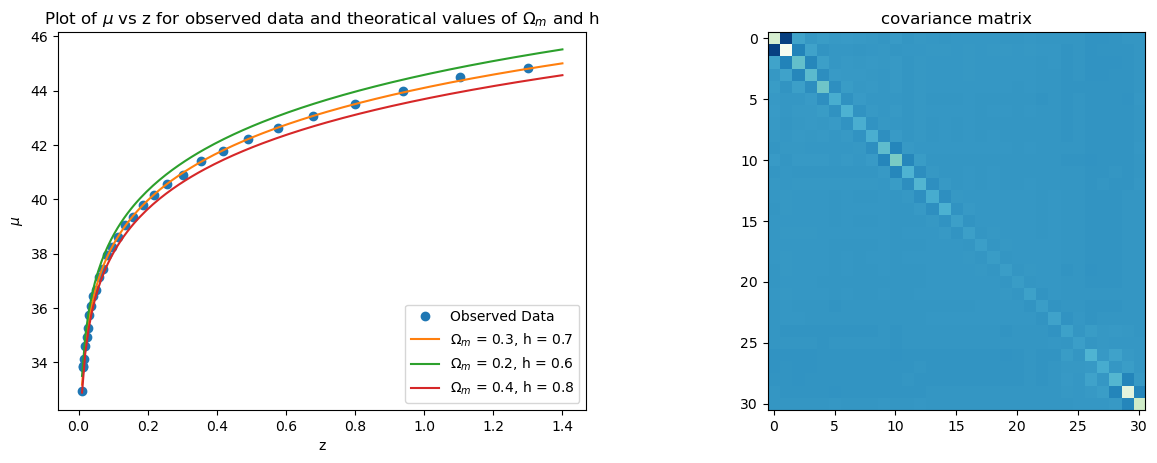

In [ ]:
z_th = np.linspace(0.01, 1.4, 150)
mu_th1 = mu_theory(z_th, 0.3, 0.7)
mu_th2 = mu_theory(z_th, 0.2, 0.6)
mu_th3 = mu_theory(z_th, 0.4, 0.8)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,5), dpi = 100)
ax0.plot(z, mu,'o', label="Observed Data")
ax0.plot(z_th, mu_th1, label="$\Omega_m$ = 0.3, h = 0.7")
ax0.plot(z_th, mu_th2, label="$\Omega_m$ = 0.2, h = 0.6")
ax0.plot(z_th, mu_th3, label="$\Omega_m$ = 0.4, h = 0.8")
ax0.set_ylabel('$\mu$')
ax0.set_xlabel('z')
ax0.set_title('Plot of $\mu$ vs z for observed data and theoratical values of $\Omega_m$ and h')
ax1.imshow(cov_matrix, cmap="GnBu_r")
ax1.set_title("covariance matrix")
ax0.legend()
plt.show()

# Exercise

Write an MCMC code to estimate $h$ and $\Omega_m$ from the supernova dataset, assuming the Universe is flat and the errors are gaussian$^2$ , i.e. assume that the likelihood is

$$L \propto exp \left[ -\frac{1}{2} \sum_{i,j=1}^{n} [\mu_i - \mu_{th}(z_i)] C^{-1}_{ij}[\mu_j - \mu_{th}(z_j)] \right]$$

where $\mu_{th}$ is the theoretical value of the distance modulus, for which you will need to compute the integral for $D^*_L$ numerically, using the fitting formula (for a flat Universe). For clarity, we have not written the full dependence of $\mu_{th} ; $ we should write $\mu_{th} (z ; \Omega_m, h)$, and indeed it also depends on the (LCDM) model M.

$C$ is the $31$ × $31$ covariance matrix of the data, provided as a list of numbers in an obvious order, from the website, in the file jla_mub_covmatrix.txt.

*   h and $\Omega_m$ are positive, and have values of the rough order of unity.

*   Assume uniform priors on the parameters (so you estimate the likelihood).

*   You might like to start with a very simple ‘top-hat’ proposal distribution, where the new point is selected from a rectangular region centred on the old point. For this you will need a simple random number generator. Or use a gaussian for each parameter.

*   Explore visually the chain when you have (a) a very small proposal distribution, and (b) a very large proposal distribution, for a maximum of $1000$ trials. What do you conclude?

*   Show how the acceptance probability changes as you change the size of the proposal distribution from very small (say $0.001)$ to very large (say $100$).

*   Once you have settled on a ‘reasonable’ proposal distribution, compute the average value of the parameter estimates under the posterior distribution, and their variances and covariance.
*   Optionally, generalise to non-flat Universes and include $\Omega_v$ as an independent parameter.



### Log of Likelihood Calculating Function

In [ ]:
def mu_diff(Omega_m, h):
    MU = np.zeros(31)
    for i in range(31):
        MU[i] = mu[i] - mu_theory(z[i], Omega_m, h)
    return MU

# Defining log of likelihood (Assuming gaussian errors)
def likelihood(Omega_m, h):
    if(Omega_m > 0 and h>0 and Omega_m < 1) and h <1:
        log_L = -0.5*np.dot(mu_diff(Omega_m, h), np.dot(np.linalg.inv(cov_matrix),mu_diff(Omega_m, h)))
    else:
        log_L = -1*np.exp(100)
    return log_L

### Metropolis-Hastings sampler

In [ ]:
def MH_sampler(M,N,Omegam_in, h_in, sigma):
    # Metroplis-Hastings algorithm:
    h_accepted = []
    Omegam_accepted = []
    acceptance_likelihood = []
    Naccepted = []
    for i in range(M):
        Naccept = 0
        h_accept = [h_in[i]]
        Omegam_accept = [Omegam_in[i]]
        acpt_lkhd = []
        for j in range(N):

            #Generating random values of h and Omega_m in range (0,1) with Gaussian proposal distribution
            h_random       = np.random.normal(h_accept[-1], sigma[0])
            omega_m_random = np.random.normal(Omegam_accept[-1], sigma[1])

            #Calulating log of likelihood of these randomly generated 
            new_log_L = likelihood(omega_m_random, h_random)

            '''
            calulating acceptance probability and taking minimum of 1 and ratio of likelihood of new omega_m and h to
            previous accepted omega_m and h. If the ratio of likelihood is increased then it is accepted without condition.
            But if the likelihood goes down in next step then it would be accepted with uniform probability.
            '''
            acc_prob = min(np.exp(new_log_L - likelihood(Omegam_accept[-1], h_accept[-1])), 1)

            if np.random.uniform(0, 1) < acc_prob:
                h_accept       = np.append(h_accept, h_random)
                Omegam_accept = np.append(Omegam_accept, omega_m_random)
                acpt_lkhd           = np.append(acpt_lkhd, new_log_L)
                Naccept+=1
        h_accepted.append(h_accept)
        Omegam_accepted.append(Omegam_accept)
        acceptance_likelihood.append(acpt_lkhd)
        Naccepted.append(Naccept)
    return h_accepted, Omegam_accepted, acceptance_likelihood, Naccepted

In [ ]:
#Running M chains with N samples each
M = 5
N = 200000
Nburn = 150
sigma = [0.015, 0.015] 
h_in = [0.1, 0.3, 0.5, 0.7, 0.99]
Omegam_in = [0.1, 0.7, 0.5, 0.3, 0.99]

h_accepted, Omegam_accepted, acceptance_likelihood, Naccepted = MH_sampler(M, N, Omegam_in, h_in, sigma)

C:\Users\Avinash\AppData\Local\Temp/ipykernel_13440/2648704963.py:26: RuntimeWarning: overflow encountered in exp
  acc_prob = min(np.exp(new_log_L - likelihood(Omegam_accept[-1], h_accept[-1])), 1)


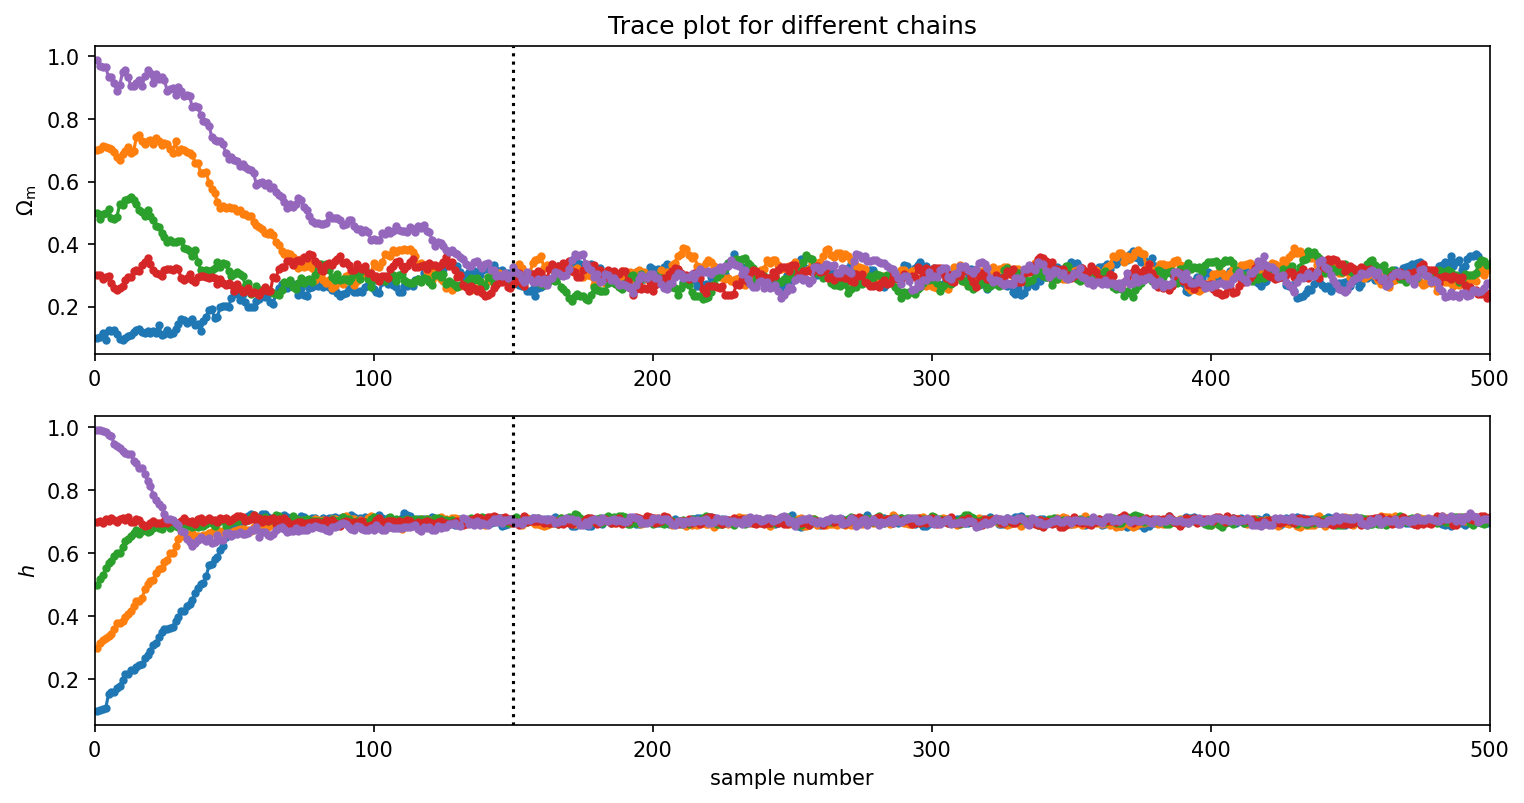

For chain no.: 1   Acceptance ratio = 38.0%
    h_mean, h_std    = 0.703, 0.007
    Ωm_mean, Ωm_std  = 0.297, 0.03
    
For chain no.: 2   Acceptance ratio = 37.7%
    h_mean, h_std    = 0.703, 0.008
    Ωm_mean, Ωm_std  = 0.298, 0.031
    
For chain no.: 3   Acceptance ratio = 37.8%
    h_mean, h_std    = 0.703, 0.007
    Ωm_mean, Ωm_std  = 0.297, 0.03
    
For chain no.: 4   Acceptance ratio = 37.8%
    h_mean, h_std    = 0.703, 0.007
    Ωm_mean, Ωm_std  = 0.298, 0.031
    
For chain no.: 5   Acceptance ratio = 37.6%
    h_mean, h_std    = 0.703, 0.007
    Ωm_mean, Ωm_std  = 0.297, 0.03
    


In [ ]:
#Plotting Trace plot for Omega_m and h for all the cains
fig, (ax0, ax1) = plt.subplots(2,1,figsize=(12,6),dpi = 150)
ax0.set_xlim(0,500)
ax0.set_ylabel("$\Omega_\mathrm{m}$")
for i in range(M):
    ax0.plot(np.arange(1, Naccepted[i]+2, 1), Omegam_accepted[i],marker='.')
ax0.axvline(Nburn, color='black', linestyle=':')
ax0.set_title("Trace plot for different chains")

ax1.set_xlim(0,500)
ax1.set_ylabel("$h$")
ax1.set_xlabel("sample number")
for i in range(M):
    ax1.plot(np.arange(1, Naccepted[i]+2, 1),h_accepted[i],marker='.')
ax1.axvline(Nburn, color='black', linestyle=':')
plt.show()

for i in range(M):
    print(f'''For chain no.: {i+1}   Acceptance ratio = {round(Naccepted[i]*100/N,1)}%
    h_mean, h_std    = {round(np.average(h_accepted[i][Nburn:]), 3)}, {round(np.std(h_accepted[i][Nburn:]),3)}
    Ωm_mean, Ωm_std  = {round(np.average(Omegam_accepted[i][Nburn:]),3)}, {round(np.std(Omegam_accepted[i][Nburn:]),3)}
    ''')

#combining all the chains to create larger sample (To save computation time as I already have 5 chains)
h_all = np.array([])
Omegam_m_all = []
acceptance_likelihood_all = []
for i in range(M):
    h_all = np.append(h_accepted[i][Nburn+1:], h_all)
    Omegam_m_all = np.append(Omegam_accepted[i][Nburn+1:], Omegam_m_all)
    acceptance_likelihood_all = np.append(acceptance_likelihood[i][Nburn:], acceptance_likelihood_all)

Text(0.5, 0, '$\\Omega_m$ $\\longrightarrow$')

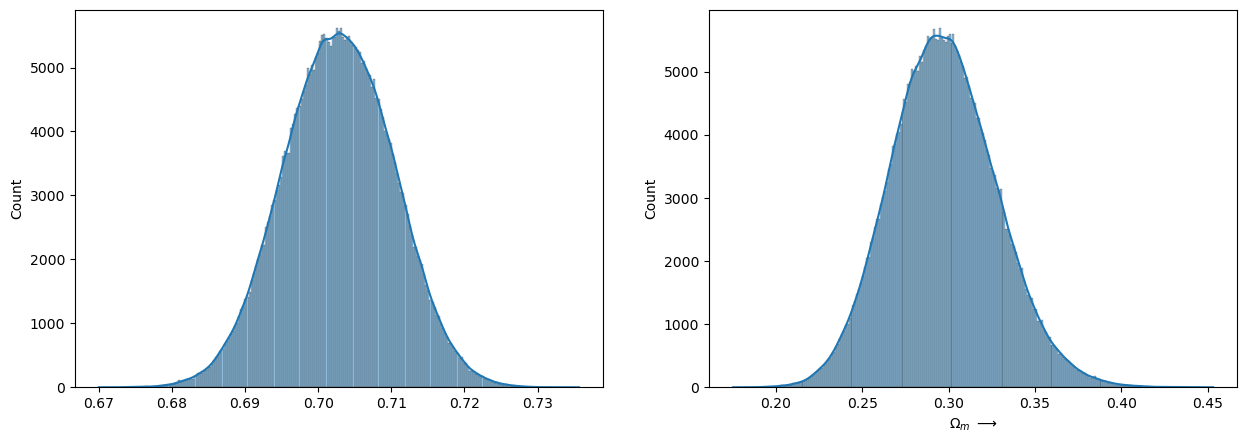

In [ ]:
# Histogram Of Both parameter to Visualise it's distribution
import seaborn as sns
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,5), dpi = 100)

sns.histplot(h_all, ax= ax0, kde=True)
ax0.set_xlabel('h $\longrightarrow$')

sns.histplot(Omegam_m_all, ax= ax1, kde=True)
ax1.set_xlabel('$\Omega_m$ $\longrightarrow$')
plt.show()

## Extensions
### **Importance sampling**
 Consider a non-flat prior, so the target distribution is the posterior, not
the likelihood. We can still sample from the likelihood (as you have been doing), and construct
the posterior by weighting the points with the prior to get the target. This is an example of
importance sampling, where we sample from a different distribution from the one we eventually
want. Apply a prior on the Hubble constant to your chain, assuming a gaussian prior with mean
0.738 and standard deviation 0.024. Now plotting all the points in the chain will give a graph
which looks the same as your previous graphs, so what should you do?

Compute the mean $h$, $\Omega_m$ with and without the prior.

Gaussian Prior with $h_{mean}$ i.e. $\mu$ = $0.738$ and standard deviation i.e. $\sigma = 0.024$ is:

$$pdf = \frac{1}{\sqrt{2\pi\sigma^2}}\exp{-\frac{(h-\mu)^2}{2\sigma^2}}$$

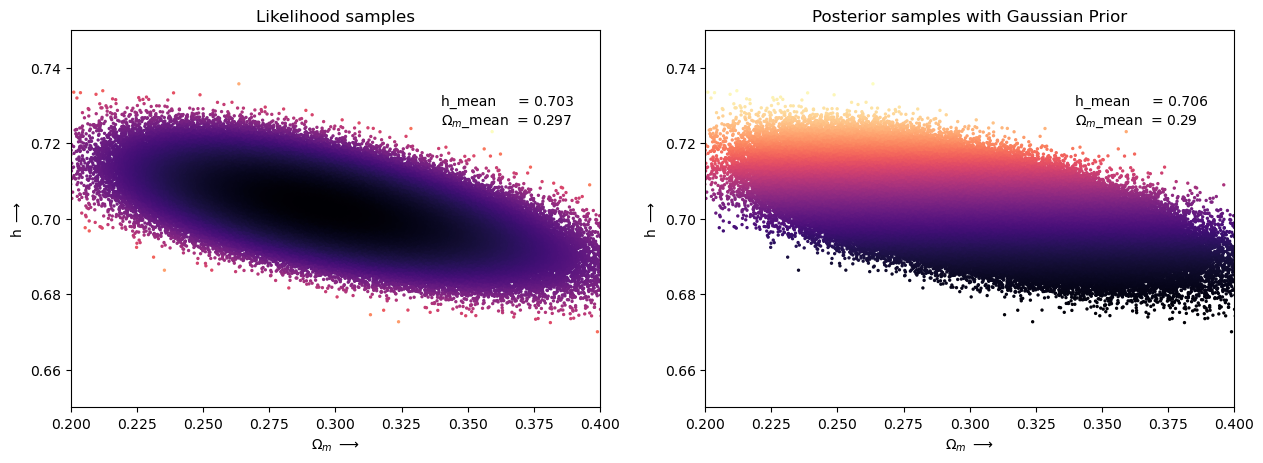

In [ ]:
# Given Prior Infromation
h_mean, h_std = 0.738, 0.024

#Definition of Gaussian Function
def gaussian_pdf(x, mu, sigma):
    pdf = (1/(sigma*math.sqrt(2*np.pi)))*math.exp(-math.pow(x-mu, 2)/(2*math.pow(sigma, 2)))
    return pdf

# #Weighting all the samples using prior distribution funtion
weights = np.empty(len(h_all))

for i in range(len(h_all)):
    weights[i]  = gaussian_pdf(h_all[i], h_mean,h_std)

# weightted average can eihther be found using numpy predefined function as 
h_weighted_avg = np.dot(h_all, weights)/np.sum(weights)
Omegam_weighted_avg = np.dot(Omegam_m_all, weights)/np.sum(weights)

# Plot of h and  Omegam
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,5), dpi = 100)
ax0.scatter(Omegam_m_all, h_all, s=2, c= -acceptance_likelihood_all, cmap="magma")
ax0.set_ylabel('h $\longrightarrow$')
ax0.set_xlabel('$\Omega_m$ $\longrightarrow$')
ax0.set_title(f'Likelihood samples')
ax0.set_xlim(0.2,0.4)
ax0.set_ylim(0.65,0.75)
ax0.text(0.34,0.73, r'h_mean     = {}'.format(round(np.average(h_all), 3)))
ax0.text(0.34,0.725, r'$\Omega_m$_mean  = {}'.format(round(np.average(Omegam_m_all), 3)))

ax1.scatter(Omegam_m_all, h_all, c=weights, s=2, cmap="magma")
ax1.set_ylabel('h $\longrightarrow$')
ax1.set_xlabel('$\Omega_m$ $\longrightarrow$')
ax1.set_title(f'Posterior samples with Gaussian Prior')
ax1.set_xlim(0.2,0.4)
ax1.set_ylim(0.65,0.75)
ax1.text(0.34,0.73, r'h_mean     = {}'.format(round(h_weighted_avg, 3)))
ax1.text(0.34,0.725, r'$\Omega_m$_mean  = {}'.format(round(Omegam_weighted_avg, 3)))
plt.show()

## Gelman-Rubin test

**Parameters**:
* $M$: number of chains
* $N$: length of chains

**Definitions**:
* Between-chains variance:
\begin{equation}
B \equiv \frac{N}{M-1} \sum_{m=1}^M \left( \widehat{\theta}_{m} - \widehat{\theta} \right)^2 \quad \mathrm{where} \;\;\widehat{\theta} \equiv \frac{1}{M} \sum_{m=1}^M \widehat{\theta}_{m}
\end{equation}
* Within-chains variance:
\begin{equation}
W \equiv \frac{1}{M} \sum_{m=1}^M \sigma_m^2 \quad
\end{equation}

**Estimators**:
Estimators of the marginal posterior variance of the estimand:
* $\widehat{\mathrm{var}}^- \equiv W$: underestimates the variance
* $\widehat{\mathrm{var}}^+ \equiv \frac{N-1}{N}W + \frac{M+1}{MN} B$: overestimates the variance

**Test**:
* Potential scale reduction factor: $\widehat{R} \equiv \sqrt{\frac{\widehat{\mathrm{var}}^+}{\widehat{\mathrm{var}}^-}}$
* Test: $\widehat{R} \rightarrow 1$ as $n \rightarrow \infty$

In [ ]:
def gelman_rubin_test(M,N, h_accepted, Omegam_accepted):
    #Between-Chain Variance
    h_mean_each_chain = np.array([np.mean(h_accepted[m]) for m in range(M)])
    omegam_mean_each_chain = np.array([np.mean(Omegam_accepted[m]) for m in range(M)])
    theta_hat_h = np.mean(h_mean_each_chain)
    theta_hat_omegam = np.mean(omegam_mean_each_chain)
    B_h = (N/(M-1))*np.sum((h_mean_each_chain - theta_hat_h)**2)
    B_omegam = (N/(M-1))*np.sum((omegam_mean_each_chain - theta_hat_omegam)**2)

    #within Chain Variance
    h_var_each_chain = np.array([np.var(h_accepted[m]) for m in range(M)])
    omegam_var_each_chain = np.array([np.var(Omegam_accepted[m]) for m in range(M)])
    W_h = np.mean(h_var_each_chain)
    W_omegam = np.mean(omegam_var_each_chain)

    #Estimators
    var_minus_h = W_h
    var_plus_h = ((N - 1)/N)* W_h + ((M+1)/(M*N))*B_h
    var_minus_omegam = W_omegam
    var_plus_omegam = ((N - 1)/N)* W_omegam + ((M+1)/(M*N))*B_omegam

    #Test
    R_hat_h = np.sqrt(var_plus_h / var_minus_h)
    R_hat_omegam = np.sqrt(var_plus_omegam / var_minus_omegam)

    return R_hat_h, R_hat_omegam

R_hat_h, R_hat_omegam = gelman_rubin_test(M,N, h_accepted, Omegam_accepted)
print(f'''
R_hat for h        = {R_hat_h}
R_hat for Omega_m  = {R_hat_omegam}
''')


R_hat for h        = 1.0000587896653046
R_hat for Omega_m  = 1.000335157657689



As the test tends to 1 that means the parameter estimated is converging.

## Hamiltonian Monte Carlo

**HMC Sampler**\
*`With Hamiltonian Used to calculate Acceptance Probability`*

C:\Users\Avinash\AppData\Local\Temp/ipykernel_13440/3465130511.py:3: RuntimeWarning: divide by zero encountered in log
  def U(q):      return -np.log(pdf(q, q_mean, q_std))



For h:
mean    = 0.703
std     = 0.003
Acceptance ratio = 92.13%

For Omegam:
mean      = 0.298
std       = 0.029
Acceptance ratio = 99.96%



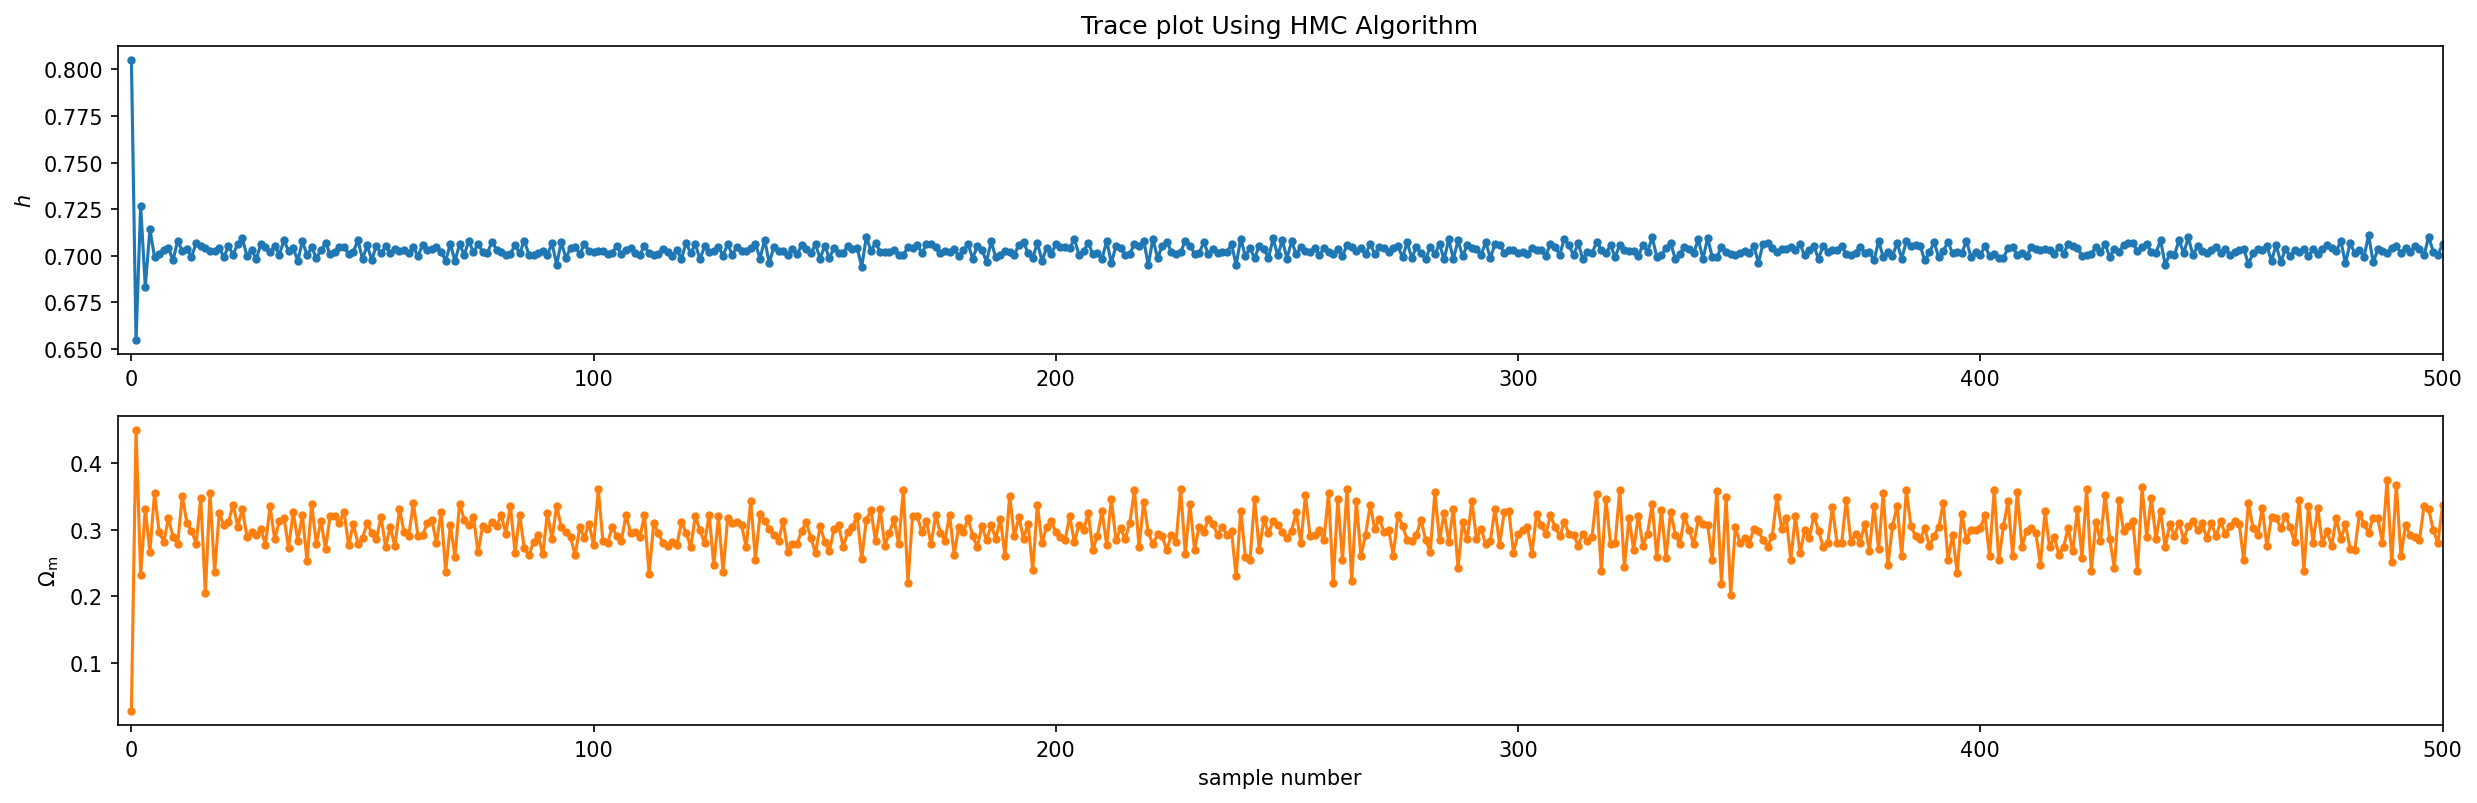

In [ ]:
def HMC_sampler(q_in, q_mean, q_std, Nsamps, epsilon, Nsteps):
    # All the nessesary functions to define Hamiltonian and Gradient of Potential surface
    def pdf(q, q_mean, q_std):    return (1/(q_std*math.sqrt(2*np.pi)))*math.exp(-math.pow(q - q_mean, 2)/(2*math.pow(q_std, 2)))
    def U(q):      return -np.log(pdf(q, q_mean, q_std))
    def K(p):      return 0.5*p**2
    def H(q, p):   return U(q) + K(p)
    def U_grad(q): return (q - q_mean)/np.power(q_std, 2)

    #Leapfrog Integrator
    def leapfrog(q, p, epsilon, Nsteps):
        for i in range(Nsteps):  
            #Kick
            p = p - 0.5*epsilon*U_grad(q)
            #Drift
            q = q + epsilon*p
            #kick
            p = p - 0.5*epsilon*U_grad(q)
        return q, p

    #Actual HMC algorithm (Markov Chain Instead)
    q = q_in
    q_accepted = []
    Nacpt = 0

    for i in range(Nsamps):
        p = np.random.normal(0,1)
        q_new, p_new = leapfrog(q, p, epsilon, Nsteps)

        del_H = H(q_new,p_new) - H(q,p)

        #condition to accept the h and omega
        if np.random.uniform(0,1) < min(1, np.exp(-del_H)):
            q = q_new
            Nacpt +=1
            q_accepted.append(q)

    return q_accepted, Nacpt
    

#Using result from previous MCMC MH algorithm to construct pdf of h and Omega_m
h_in = 0.50
h_mean = 0.703
h_std = 0.003

Omegam_in = 0.8
Omegam_mean = 0.298
Omegam_std = 0.029

Nsamps = 10000
epsilon = 0.003
Nsteps = 100

h_acpt, Nacpt1 = HMC_sampler(h_in, h_mean, h_std, Nsamps, epsilon, Nsteps)
Omegam_acpt, Nacpt2 = HMC_sampler(Omegam_in, Omegam_mean, Omegam_std, Nsamps, epsilon, Nsteps)


#Plotting and Printing the result
fig, (ax0, ax1) = plt.subplots(2,1,figsize=(20,6), dpi = 150)
# ax0.set_xlim(0,Ntries+1)
ax0.set_title("Trace plot Using HMC Algorithm")
ax0.set_ylabel("$h$")
ax0.plot(np.arange(Nacpt1),h_acpt,marker='.',color='C0')
ax0.set_xlim(-3,500)

ax1.set_ylabel("$\Omega_\mathrm{m}$")
ax1.plot(np.arange(Nacpt2),Omegam_acpt,marker='.',color='C1')
ax1.set_xlabel("sample number")
ax1.set_xlim(-3,500)

print(f'''
For h:
mean    = {round(np.average(h_acpt), 3)}
std     = {round(np.std(h_acpt), 3)}
Acceptance ratio = {Nacpt1*100/Nsamps}%

For Omegam:
mean      = {round(np.average(Omegam_acpt), 3)}
std       = {round(np.std(Omegam_acpt), 3)}
Acceptance ratio = {Nacpt2*100/Nsamps}%
''')

**HMC Sampler**\
*`With Given Likelihood function used to calculate Acceptance Probability`*


For h:
mean    = 0.703
std     = 0.003
Acceptance ratio = 74.24%

For Omegam:
mean      = 0.297
std       = 0.02
Acceptance ratio = 74.24%



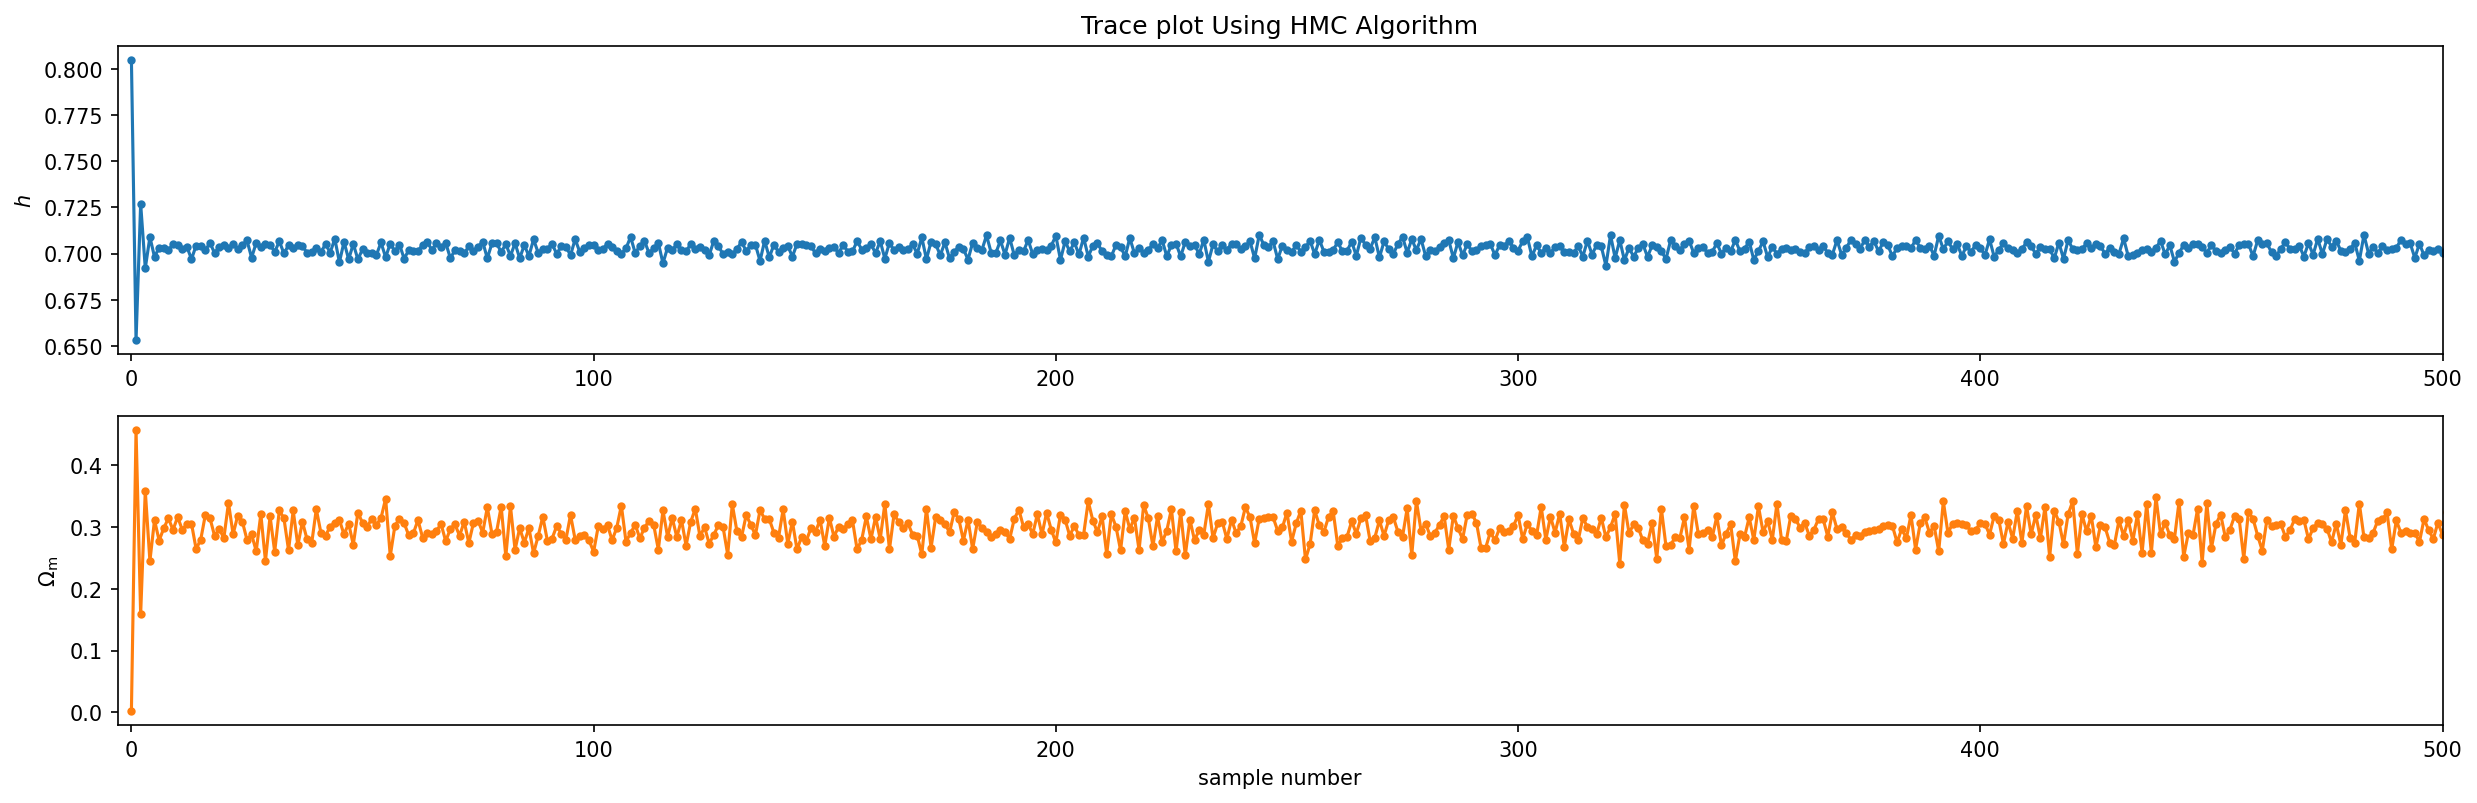

In [ ]:
#All the required functions
def pdf(q, q_mean, q_std):    return (1/(q_std*math.sqrt(2*np.pi)))*math.exp(-math.pow(q - q_mean, 2)/(2*math.pow(q_std, 2)))
def U(q, q_mean, q_std):      return -np.log(pdf(q, q_mean, q_std))
def K(p):      return 0.5*p**2
def H(q, p, q_mean, q_std):   return U(q, q_mean, q_std) + K(p)
def U_grad(q, q_mean, q_std): return (q - q_mean)/np.power(q_std, 2)

#Leapfrog Integrator
def leapfrog(q, p, q_mean, q_std, epsilon, Nsteps):
    for i in range(Nsteps):  
        #Kick
        p = p - 0.5*epsilon*U_grad(q, q_mean, q_std)
        #Drift
        q = q + epsilon*p
        #kick
        p = p - 0.5*epsilon*U_grad(q, q_mean, q_std)
    return q, p

#array to stored accepted values of both parameters
h_ac = []
Omg_ac = []
Nac = 0
h = h_in
Omegam = Omegam_in

#Loops to propose and accept the parameter points
for i in range(Nsamps):
    #Generating random value of momentum with mean 0 and standard deviation 1
    p = np.random.normal(0,1,2)

    h_new, p0_new = leapfrog(h, p[0], h_mean, h_std, epsilon, Nsteps)
    Omegam_new, p1_new = leapfrog(Omegam, p[1], Omegam_mean, Omegam_std, epsilon, Nsteps)

    if h_new>0 and Omegam_new>0:
        #Calulating log of likelihood of these randomly generated 
        new_log_L = likelihood(Omegam_new, h_new)

        '''
        calulating acceptance probability and taking minimum of 1 and ratio of likelihood of new omega_m and h to
        previous accepted omega_m and h. If the ratio of likelihood is increased then it is accepted without condition.
        But if the likelihood goes down in next step then it would be accepted with uniform probability.
        '''
        acc_prob = min(np.exp(new_log_L - likelihood(Omegam, h)), 1)

        if np.random.uniform(0, 1) < acc_prob:
            h = h_new
            Omegam = Omegam_new
            h_ac.append(h)
            Omg_ac.append(Omegam)
            Nac+=1


#Plot of results
fig, (ax0, ax1) = plt.subplots(2,1,figsize=(20,6), dpi = 150)
# ax0.set_xlim(0,Ntries+1)
ax0.set_title("Trace plot Using HMC Algorithm")
ax0.set_ylabel("$h$")
ax0.plot(np.arange(Nac),h_ac,marker='.',color='C0')
ax0.set_xlim(-3,500)

ax1.set_ylabel("$\Omega_\mathrm{m}$")
ax1.plot(np.arange(Nac),Omg_ac,marker='.',color='C1')
ax1.set_xlabel("sample number")
ax1.set_xlim(-3,500)

print(f'''
For h:
mean    = {round(np.average(h_ac), 3)}
std     = {round(np.std(h_ac), 3)}
Acceptance ratio = {Nac*100/Nsamps}%

For Omegam:
mean      = {round(np.average(Omg_ac), 3)}
std       = {round(np.std(Omg_ac), 3)}
Acceptance ratio = {Nac*100/Nsamps}%
''')